# GEQIE NEQR Example

## Setup

### Imports

In [1]:
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt

In [2]:
import geqie
from geqie.encodings import neqr

## Encoding

### Opening the image

Opening the test image and normalizing its pixel values to $[0.0, 1.0]$.

In [3]:
image = Image.open("../../assets/test_images/grayscale/test_image_4x4.png")
image = ImageOps.grayscale(image)
image = np.asarray(image)
image

array([[255,   0, 255, 127],
       [255,   0,   0, 255],
       [195, 255, 255, 255],
       [255, 195,   0, 255]], dtype=uint8)

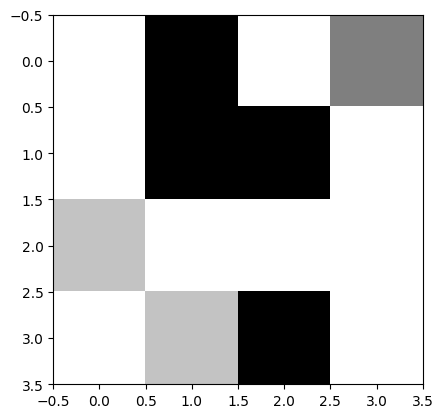

In [4]:
plt.imshow(image, cmap="gray")

### Encoding using unitary gate

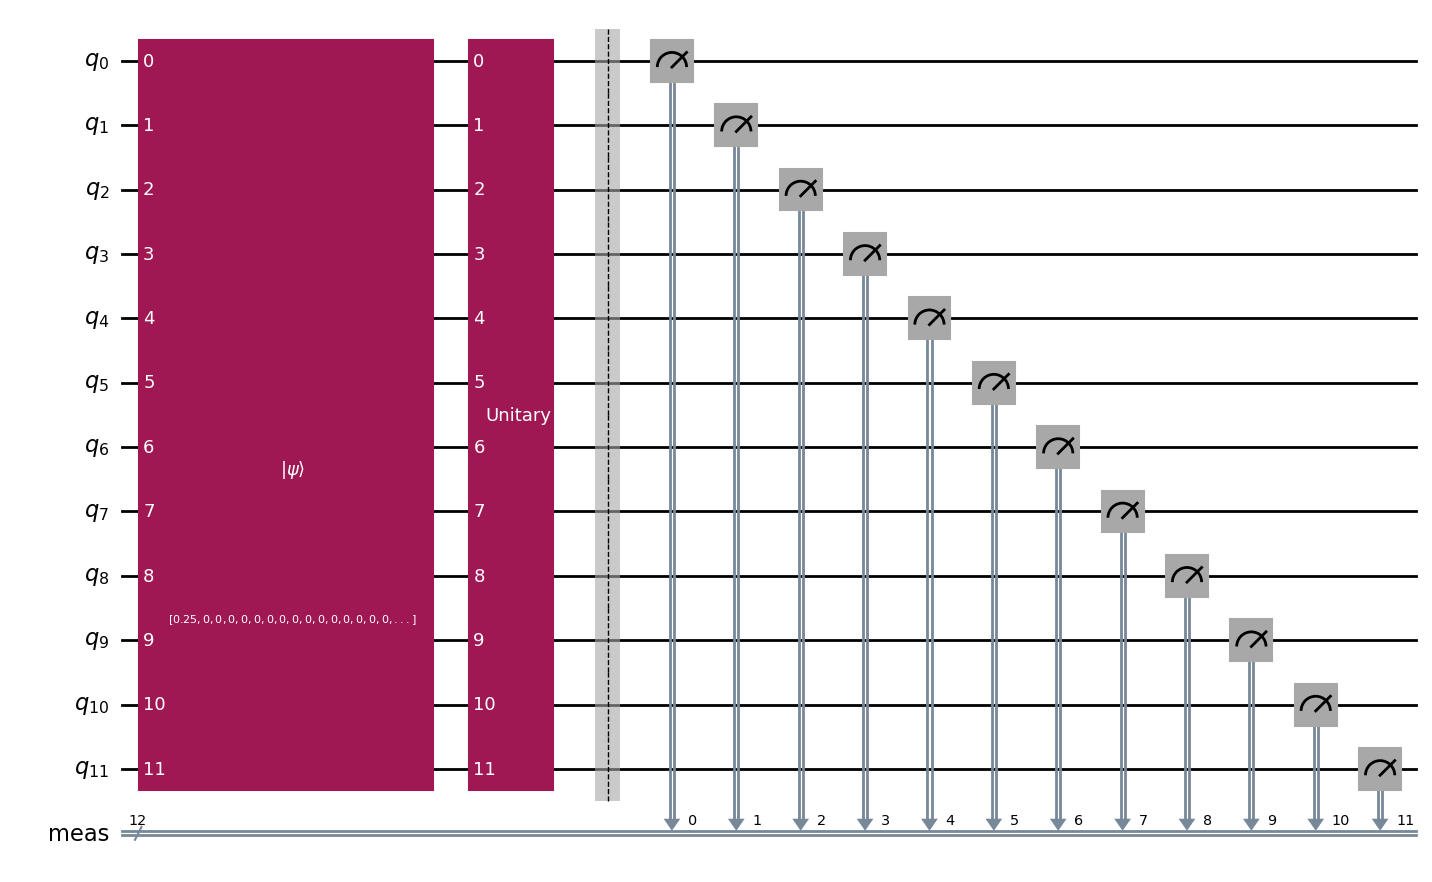

In [5]:
circuit = geqie.encode(neqr.init_function, neqr.data_function, neqr.map_function, image)
circuit.draw(output="mpl")

### Simulating the circuit

In [6]:
result = geqie.simulate(circuit, 1000)

## Interpretation of the results

Total state $\ket{\psi}$ is equal to:
$$\ket{\psi} = \ket{X\_ coordinates}^{log_2(x)}\otimes\ket{Y\_ coordinates}^{log_2(y)}\otimes\ket{color}^{\otimes 8}$$
Where:
- $\ket{X\_ coordinates}^{log_2(x)}$ and $\ket{Y\_ coordinates}^{log_2(y)}$ corresponds to X and Y positions encodings respectively,
- Last 8 qubits corresponds to color intensity, for example: $77 = \ket{01001101}$ (corresponds to $2^6+2^3+2^2+2^0$).

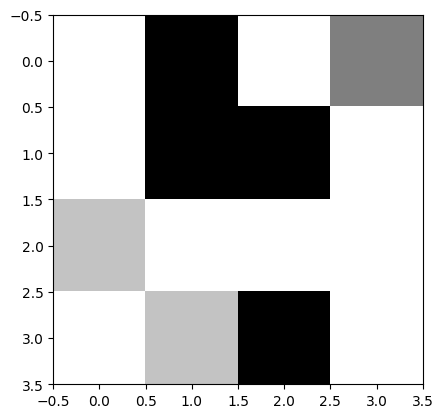

In [7]:
retrieved_image = neqr.retrieve_function(result)
plt.imshow(retrieved_image, cmap="gray")
plt.show()

### Reconstructed image

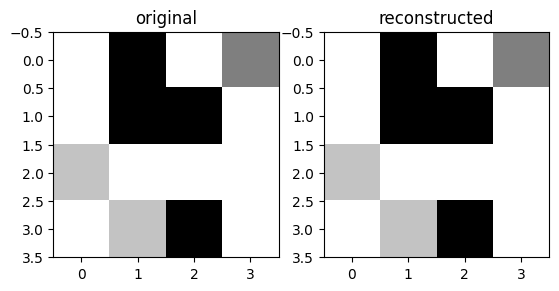

In [8]:
f = plt.figure()
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax.set_title("original")
ax.imshow(image, cmap="gray")

ax = f.add_subplot(gs[0, 1])
ax.set_title("reconstructed")
ax.imshow(retrieved_image, cmap="gray")